# Rabbits and Foxes

I am running this in Python 2 at the moment becuause matplotlib is not working in my conda install of python 3.

# Euler's Method

In [17]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Initial conditions and values needed for the entire problem

k_1 = 0.015 # day^-1
k_2 = 0.00004 # day^-1 foxes^-1
k_3 = 0.0004 # day^-1 rabbits^-1
k_4 = 0.04 # day^-1

t_final = 600 # days
R_i = 400
F_i = 200


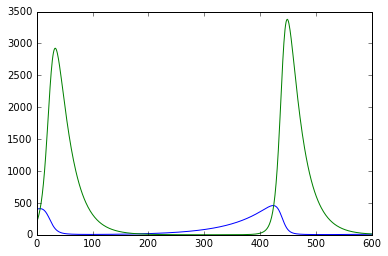

In [32]:
# Euler's method

i = 0
time = 0
del_t = 1 # The interval of time to change (days)
R = [] # A list of rabbit populations (number of rabbits)
F = [] # A list of fox populations (number of foxes)
t = [] # A list of corresponding times (days)

# Adding initial conditions to the corresponding lists
R.append(R_i)
F.append(F_i)
t.append(time)

# Performing Euler's method
while time < t_final:
    del_t = 1
    R.append(R[i] + del_t*(k_1 * R[i] - k_2 * R[i] * F[i]))
    F.append(F[i] + del_t*(k_3 * R[i] * F[i] - k_4 * F[i]))
    i += 1
    time += del_t
    t.append(time)

# Generate a plot of Euler's Method
plt.plot(t, R)
plt.plot(t, F)

# ODEINT Method

In [4]:
from scipy.integrate import odeint

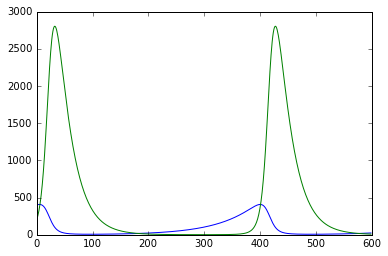

In [5]:
# odeint method

# Specify the initial conditions
population = [] # Will contain two lists, the first with the population of rabbits, the second with a population of foxes.
conditions = [R_i, F_i] # Initial conditions needed for `pop`. [population of rabbits, population of foxes]
t = np.array(range(t_final)) # Time array

def pop(cond, t):
    """
    A system of functions that describe the ordinary diff. eqs. for the rabbit and fox population.
    
    `y` is a list with the rabbit and fox population at time `t`.
    """
    R, F = cond
    del_R = k_1 * R - k_2 * R * F # Combined rate of rabbit population change.
    del_F = k_3 * R * F - k_4 * F # Combined rate of fox population change.
    return del_R, del_F

population = odeint(pop, conditions, t) # Performing odeint

# Defiing which list corresponds to rabbit and fox population.
R_pop = population[:,0] #Rabbit population (number of rabbits)
F_pop = population[:,1] #Fox population (number of foxes)


# Plot the results of the odeint method
plt.plot(t, R_pop)
plt.plot(t, F_pop)

# Kinetic Monte Carlo Method

In [6]:
"""
A series of functions to define the birth and / or death of a rabbit (R) or fox (F)
"""
import random
from math import log as ln
def R_birth(R,F):
    return k_1 * R
def R_death(R,F):
    return k_2 * R * F
def F_birth(R,F):
    return k_3 * R * F
def F_death(R,F):
    return k_4 * F

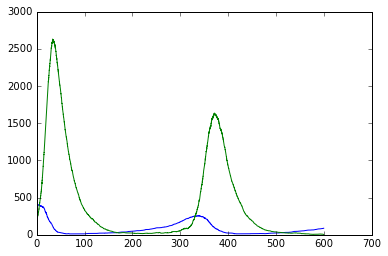

In [10]:
# kintetic Monte Carlo method

# Setting initial conditions
t = 0
rabbits = []
foxes = []
time = []

rabbits.append(R_i)
foxes.append(F_i)
time.append(t)

# Performng Monte Carlo Analysis
while t < t_final:
    
    # Selecting the latest item in the rabbits and foxes list
    r = rabbits[-1]
    f = foxes[-1]
    
    # Determining the rates for each event.
    R_b = R_birth(r,f) 
    R_d = R_death(r,f)
    F_b = F_birth(r,f)
    F_d = F_death(r,f)
    
    # Cumulative function
    sum_rates = R_b + R_d + F_b + F_d 
    uQ = (1-random.random()) * sum_rates 
    
    # Determining which list to edit
    if uQ <= R_b:
        rabbits.append(r + 1)
        foxes.append(f)
    elif R_b < uQ <= R_b + R_d:
        rabbits.append(r - 1)
        foxes.append(f)
    elif R_b + R_d < uQ <= R_b + R_d + F_b:
        rabbits.append(r)
        foxes.append(f + 1)
    else:
        rabbits.append(r)
        foxes.append(f - 1)
        
    # Change in time according to KMC methods
    del_t = ln(1/(1-random.random())) / sum_rates
    t = t + del_t
    time.append(t)

    
# Plot the results of the KMC method
plt.plot(time, rabbits)
plt.plot(time, foxes)

Occasionally, the plot corresponding to the KMC method needs to be re-ran in order to attain a shape similar to the previous solutions.